# Lending Loan Club Prediction

### Description

Lending Club is a peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score).

Lending Club provides the "bridge" between investors and borrowers. This data contains complete loan data for all loans issued for the first quarter of 2012, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information

### Objective : 

Our job is to predict based on the given data if a person will be a loan defualter or not . 

### Business impact: 

The lenders will have an idea before hand about the potential loan defaulters therefore the lenders will have a fair idea about risk in their lending process.Hence avoiding lenders from giving 

### Approach taken to solve problem

* Missing Value check
* Dropped columns with greater than 50% Null values.Since there was huge amount of data for training the model also dropped rows with missing values
* Final training data is of 1.4 lac records
* Encoded the categorical columns.Carefully studied the nature of data and did encoding according to that.(For example if data was ordinal then did ordinal encoding) . Also did Frequency encoding on two features
* Applied Normal train-test-spliton data.Divided the data into 70-30 .
* Target data imbalance was observed hence applied smote oversampling technique to improve the predictive power of model for minority class.
* Applied logistic regression algorithm. For this business the cost with false negative is high hence took recall score into consideration as evaluation metric. Also observed the evaluation metric. 
* Achieved 99% Accuracy with normal logistic regression model

In [314]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score,f1_score
import itertools
from sklearn.model_selection import GridSearchCV, cross_val_score ,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split

In [315]:
path='./Data/Train.csv'

In [316]:
#Load Dataset
df=pd.read_csv(path)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,NaN,NaN,8000.0,8000.0,8000.0,36 months,10.99%,261.88,B,B2,PARTS MANAGER,2 years,MORTGAGE,33000.0,Not Verified,Dec-2013,Charged Off,n,NaN,NaN,debt_consolidation,My Life Saving Loan :),800xx,CO,15.75,0.0,Jul-1991,1.0,NaN,104.0,9.0,1.0,7203.0,34.6%,16.0,f,0.0,0.0,5622.500000,5622.50,3854.81,1120.22,15.0,632.47,113.7204,Oct-2015,276.88,NaN,Oct-2016,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,15949.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20800.0,NaN,NaN,NaN
1,NaN,NaN,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5,Operations Manager,10+ years,RENT,81500.0,Verified,Dec-2013,Fully Paid,n,NaN,Borrower added on 12/31/13 > My goal is to p...,debt_consolidation,Reducing Debt to Purchase Home,100xx,NY,16.73,0.0,Jun-1998,2.0,64.0,NaN,29.0,0.0,23473.0,54.5%,41.0,f,0.0,0.0,23926.640008,23926.64,20800.00,3126.64,0.0,0.00,0.0000,May-2015,13334.93,NaN,Nov-2018,0.0,71.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,23473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43100.0,NaN,NaN,NaN
2,NaN,NaN,10000.0,10000.0,10000.0,36 months,9.67%,321.13,B,B1,Registered Nurse,7 years,MORTGAGE,102000.0,Not Verified,Dec-2013,Fully Paid,n,NaN,NaN,debt_consolidation,Clean Up,027xx,MA,15.55,2.0,Oct-1989,0.0,11.0,NaN,9.0,0.0,9912.0,44.4%,22.0,f,0.0,0.0,11560.462185,11560.46,10000.00,1560.46,0.0,0.00,0.0000,Jan-2017,320.91,NaN,Nov-2018,0.0,54.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,39143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22300.0,NaN,NaN,NaN
3,NaN,NaN,11500.0,11500.0,11500.0,60 months,22.90%,323.54,E,E4,Secretary,4 years,RENT,32760.0,Verified,Dec-2013,Fully Paid,n,NaN,Borrower added on 12/31/13 > This loan is fo...,debt_consolidation,Debt Killer,937xx,CA,27.06,0.0,Mar-1999,0.0,NaN,NaN,12.0,0.0,9996.0,70.9%,17.0,f,0.0,0.0,18786.250257,18786.25,11500.00,7286.25,0.0,0.00,0.0000,Sep-2017,4874.03,NaN,Dec-2017,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,92.0,24724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100.0,NaN,NaN,NaN
4,NaN,NaN,15000.0,15000.0,15000.0,36 months,8.90%,476.30,A,A5,aircraft maintenance engineer,2 years,MORTGAGE,63000.0,Not Verified,Dec-2013,Fully Paid,n,NaN,Borrower added on 12/31/13 > To pay Home Dep...,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-1998,0.0,34.0,NaN,8.0,0.0,11431.0,74.2%,29.0,w,0.0,0.0,17146.725104,17146.73,15000.00,2146.73,0.0,0.00,0.0000,Jan-2017,476.23,NaN,Dec-2016,0.0,34.0,1.0,Individual,NaN,NaN,NaN,0.0,1514.0,272492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188178,NaN,NaN,35000.0,35000.0,35000.0,36 months,15.96%,1229.81,C,C5,Tom and Holly Gores,3 years,MORTGAGE,160000.0,Source Verified,Jan-2012,Fully Paid,n,NaN,NaN,small_business,Small Business Loan,922xx,CA,4.90,0.0,Sep-2000,1.0,NaN,NaN,9.0,0.0,23665.0,62.4%,17.0,f,0.0,0.0,44272.939984,44272.94,35000.00,9272.94,0.0,0.00,0.0000,Dec-2014,1244.72,NaN,D

In [317]:
#Check for missing values
# Function to identify the number of missing values in every feature
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(df)
print(missing_data)

                   Total   Percent
inq_last_12m      188183  1.000000
dti_joint         188183  1.000000
annual_inc_joint  188183  1.000000
total_cu_tl       188183  1.000000
url               188183  1.000000
...                  ...       ...
open_acc               2  0.000011
inq_last_6mths         2  0.000011
application_type       2  0.000011
delinq_2yrs            2  0.000011
out_prncp              2  0.000011

[73 rows x 2 columns]


In [318]:
#Columns having 100% missing values
A=pd.DataFrame(missing_data)
B=A[A['Percent']>=0.5]
B

,Total,Percent
inq_last_12m,188183,1.000000
dti_joint,188183,1.000000
annual_inc_joint,188183,1.000000
total_cu_tl,188183,1.000000
url,188183,1.000000
open_acc_6m,188183,1.000000
open_il_12m,188183,1.000000
open_il_24m,188183,1.000000
mths_since_rcnt_il,188183,1.000000
total_bal_il,188183,1.000000


* The Columns shown above are having 100 % missing values

In [319]:
df.drop(['inq_last_12m','dti_joint','annual_inc_joint','total_cu_tl','url','open_acc_6m','open_il_12m','open_il_24m','mths_since_rcnt_il',
         'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','member_id','inq_fi','verification_status_joint',
         'id','next_pymnt_d','mths_since_last_record','mths_since_last_major_derog','mths_since_last_delinq','desc'
        ],1,inplace=True)

In [320]:
df.dropna(inplace=True)

In [321]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

In [322]:
#Creating Dataframe for modelling
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [323]:
#Creating dataframe for modelling
model_df=df[['loan_amnt','term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 
        'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 
       'collections_12_mths_ex_med', 
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]
model_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,8000.0,36 months,10.99%,261.88,B,B2,2 years,MORTGAGE,33000.0,Not Verified,Charged Off,15.75,0.0,1.0,9.0,1.0,7203.0,34.6%,16.0,f,0.0,0.0,5622.500000,5622.50,3854.81,1120.22,15.0,632.47,113.7204,276.88,0.0,0.0,0.0,15949.0,20800.0
1,20800.0,36 months,13.53%,706.16,B,B5,10+ years,RENT,81500.0,Verified,Fully Paid,16.73,0.0,2.0,29.0,0.0,23473.0,54.5%,41.0,f,0.0,0.0,23926.640008,23926.64,20800.00,3126.64,0.0,0.00,0.0000,13334.93,0.0,0.0,0.0,23473.0,43100.0
2,10000.0,36 months,9.67%,321.13,B,B1,7 years,MORTGAGE,102000.0,Not Verified,Fully Paid,15.55,2.0,0.0,9.0,0.0,9912.0,44.4%,22.0,f,0.0,0.0,11560.462185,11560.46,10000.00,1560.46,0.0,0.00,0.0000,320.91,0.0,0.0,0.0,39143.0,22300.0
3,11500.0,60 months,22.90%,323.54,E,E4,4 years,RENT,32760.0,Verified,Fully Paid,27.06,0.0,0.0,12.0,0.0,9996.0,70.9%,17.0,f,0.0,0.0,18786.250257,18786.25,11500.00,7286.25,0.0,0.00,0.0000,4874.03,0.0,0.0,92.0,24724.0,14100.0
4,15000.0,36 months,8.90%,476.30,A,A5,2 years,MORTGAGE,63000.0,Not Verified,Fully Paid,16.51,0.0,0.0,8.0,0.0,11431.0,74.2%,29.0,w,0.0,0.0,17146.725104,17146.73,15000.00,2146.73,0.0,0.00,0.0000,476.23,0.0,0.0,1514.0,272492.0,15400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160598,19125.0,36 months,15.31%,665.89,C,C2,10+ years,RENT,48000.0,Source Verified,Fully Paid,14.94,0.0,2.0,17.0,0.0,20985.0,49.8%,34.0,f,0.0,0.0,22492.346786,22492.35,19125.00,3367.35,0.0,0.00,0.0000,11840.19,0.0,0.0,0.0,20985.0,42100.0
160600,10000.0,36 months,11.14%,328.06,B,B2,5 years,MORTGAGE,61400.0,Not Verified,Fully Paid,8.42,0.0,0.0,11.0,0.0,3812.0,29.8%,17.0,f,0.0,0.0,11809.758589,11514.51,10000.00,1809.76,0.0,0.00,0.0000,328.36,0.0,0.0,0.0,248802.0,12800.0
160601,16000.0,36 months,17.77%,576.60,D,D1,4 years,MORTGAGE,59000.0,Not Verified,Charged Off,13.16,0.0,0.0,12.0,0.0,23350.0,61.4%,30.0,f,0.0,0.0,15254.600000,15254.60,10183.20,4226.40,0.0,845.00,8.3960,576.60,0.0,0.0,0.0,61484.0,38000.0
160602,6000.0,36 months,6.03%,182.62,A,A1,10+ years,MORTGAGE,136000.0,Not Verified,Fully Paid,9.57,0.0,0.0,7.0,0.0,461.0,7.7%,20.0,f,0.0,0.0,6574.052164,6409.70,6000.00,574.05,0.0,0.00,0.0000,185.80,0.0,0.0,0.0,307338.0,6000.0


In [324]:
model_df['term'].value_counts()

 36 months    112741
 60 months     37434
Name: term, dtype: int64

In [325]:
#Encoding term column

fe2=model_df.groupby('term').size()/len(df)
model_df['term']=model_df['term'].map(fe2)
#Encoding interest rate column
model_df['int_rate']=model_df['int_rate'].str.replace('%',' ')

#Encoding emp_length column
model_df['emp_length'].value_counts()

emp_ord={'10+ years':10,
        '2 years':2,'3 years':3,
        '5 years':5,'< 1 year':0.9,'6 years':6,'7 years':7,
        '1 years':1,'4 years':4,
        '8 years':8,'9 years':9}
model_df['emp_length']=model_df['emp_length'].map(emp_ord)


#Encoding Home Ownership column
model_df['home_ownership'].value_counts()
fe=model_df.groupby('home_ownership').size()/len(df)
model_df['home_ownership']=model_df['home_ownership'].map(fe)

#Encoding interest revol_util column
model_df['revol_util']=model_df['revol_util'].str.replace('%','')

#Intial List status column encoding
fe1=model_df.groupby('initial_list_status').size()/len(df)
model_df['initial_list_status']=model_df['initial_list_status'].map(fe1)

#Encoding loan status
model_df['loan_status']= np.where((model_df['loan_status'] == 'Fully Paid') |
                        (model_df['loan_status'] == 'Current') , 0, 1)

#One hot encoding of columns
model_df=pd.get_dummies(model_df,columns=['verification_status','grade','sub_grade'])


In [326]:
model_df['int_rate']=model_df['int_rate'].astype(float)
model_df['total_acc']=model_df['total_acc'].astype(int)
model_df['revol_util']=model_df['revol_util'].astype(float)
model_df

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,8000.0,0.750731,10.99,261.88,2.0,0.529782,33000.0,1,15.75,0.0,1.0,9.0,1.0,7203.0,34.6,16,0.751264,0.0,0.0,5622.500000,5622.50,3854.81,1120.22,15.0,632.47,113.7204,276.88,0.0,0.0,0.0,15949.0,20800.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20800.0,0.750731,13.53,706.16,10.0,0.391110,81500.0,0,16.73,0.0,2.0,29.0,0.0,23473.0,54.5,41,0.751264,0.0,0.0,23926.640008,23926.64,20800.00,3126.64,0.0,0.00,0.0000,13334.93,0.0,0.0,0.0,23473.0,43100.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10000.0,0.750731,9.67,321.13,7.0,0.529782,102000.0,0,15.55,2.0,0.0,9.0,0.0,9912.0,44.4,22,0.751264,0.0,0.0,11560.462185,11560.46,10000.00,1560.46,0.0,0.00,0.0000,320.91,0.0,0.0,0.0,39143.0,22300.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11500.0,0.249269,22.90,323.54,4.0,0.391110,32760.0,0,27.06,0.0,0.0,12.0,0.0,9996.0,70.9,17,0.751264,0.0,0.0,18786.250257,18786.25,11500.00,7286.25,0.0,0.00,0.0000,4874.03,0.0,0.0,92.0,24724.0,14100.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15000.0,0.750731,8.90,476.30,2.0,0.529782,63000.0,0,16.51,0.0,0.0,8.0,0.0,11431.0,74.2,29,0.248736,0.0,0.0,17146.725104,17146.73,15000.00,2146.73,0.0,0.00,0.0000,476.23,0.0,0.0,1514.0,272492.0,15400.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160598,19125.0,0.750731,15.31,665.89,10.0,0.391110,48000.0,0,14.94,0.0,2.0,17.0,0.0,20985.0,49.8,34,0.751264,0.0,0.0,22492.346786,22492.35,19125.00,3367.35,0.0,0.00,0.0000,11840.19,0.0,0.0,0.0,20985.0,42100.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160600,10000.0,0.750731,11.14,328.06,5.0,0.529782,61400.0,0,8.42,0.0,0.0,11.0,0.0,3812.0,29.8,17,0.751264,0.0,0.0,11809.758589,11514.51,10000.00,1809.76,0.0,0.00,0.0000,328.36,0.0,0.0,0.0,248802.0,12800.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160601,16000.0,0.750731,17.77,576.60,4.0,0.529782,59000.0,1,13.16,0.0,0.0,12.0,0.0,23350.0,61.4,30,0.751264,0.0,0.0,15254.600000,15254.60,10183.20,4226.40,0.0,845.00,8.3960,576.60,0.0,0.0,0.0,61484.0,38000.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160602,6000.0,0.750731,6.03,182.62,10.0,0.529782,136000.0,0,9.57,0.0,0.0,7.0,0.0,461.0,7.7,20,0.751264,0.0,0.0,6574.052164,6409.70,6000.00,574.05,0.0,0.00,0.0000,185.80,0.0,0.0,0.0,307338.0,6000.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [327]:
model_df.isnull().sum()

loan_amnt          0
term               0
int_rate           0
installment        0
emp_length      9413
                ... 
sub_grade_G1       0
sub_grade_G2       0
sub_grade_G3       0
sub_grade_G4       0
sub_grade_G5       0
Length: 77, dtype: int64

In [328]:
model_df.dropna(inplace=True)

In [329]:
#Check the class imbalance
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(model_df['loan_status'])

0    84.620139
1    15.379861
Name: loan_status, dtype: float64

## Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35841
           1       0.99      0.99      0.99      6388

    accuracy                           1.00     42229
   macro avg       1.00      1.00      1.00     42229
weighted avg       1.00      1.00      1.00     42229

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Train: 0.9984868863483524
Test score: 0.9982239693101896
Log loss: 0.011757450689702362


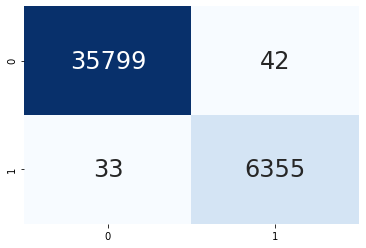

In [330]:
#Logistic Regression
from imblearn.over_sampling import SMOTE
X=model_df.drop(['loan_status'],1)
y=model_df['loan_status']
model = LogisticRegression(random_state=9)

#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
smote = SMOTE()
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)
model.fit(X_train_sm, y_train_sm)


y_pred=model.predict(X_test)

class_report=classification_report(y_test,y_pred)
print(class_report)
print('--'*100)
#train score
train_score=model.score(X_train_sm,y_train_sm)
print('Train:',train_score)
#test score
test_score=model.score(X_test,y_test)
print('Test score:',test_score)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#log loss
from sklearn.metrics import log_loss
LOG_LOSS=log_loss(y_test,model.predict_proba(X_test))
print('Log loss:',LOG_LOSS)